# DA3 Assignment 1

In [4304]:
# importing packages
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani import transforms

from IPython.core.display import HTML



warnings.filterwarnings("ignore")

In [4305]:
# reading the csv file
df = pd.read_csv("morg-2014-emp.csv")

In [4306]:
df.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.680,1692.000,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
1,5,75680310997590,January,AL,3457.114,450.000,40,41,2,NaN,...,2,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent
2,6,75680310997590,January,AL,3936.911,1090.000,60,41,2,NaN,...,2,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work
3,10,179140131100930,January,AL,3288.364,769.230,40,40,1,NaN,...,2,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work
4,11,179140131100930,January,AL,3422.850,826.920,40,43,1,NaN,...,2,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work


In [4307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149316 entries, 0 to 149315
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  149316 non-null  int64  
 1   hhid        149316 non-null  int64  
 2   intmonth    149316 non-null  object 
 3   stfips      149316 non-null  object 
 4   weight      149316 non-null  float64
 5   earnwke     149316 non-null  float64
 6   uhours      149316 non-null  int64  
 7   grade92     149316 non-null  int64  
 8   race        149316 non-null  int64  
 9   ethnic      20071 non-null   float64
 10  age         149316 non-null  int64  
 11  sex         149316 non-null  int64  
 12  marital     149316 non-null  int64  
 13  ownchild    149316 non-null  int64  
 14  chldpres    149316 non-null  int64  
 15  prcitshp    149316 non-null  object 
 16  state       149316 non-null  object 
 17  ind02       149316 non-null  object 
 18  occ2012     149316 non-null  int64  
 19  cl

In [4308]:
df.columns

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94'],
      dtype='object')

In [4309]:
# picking the occupation as Pharmacists (3050) 
df = df.loc[df["occ2012"] == 3050]

In [4310]:
df

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
10,25,620910090003769,January,AL,3851.545,1800.000,40,43,1,NaN,...,2,4,"Native, Born In US",63,Pharmacies and drug stores (44611),3050,"Private, For Profit",No,No,Employed-At Work
1556,3524,999056955039680,January,CA,2783.278,1080.000,40,44,1,NaN,...,0,0,"Foreign Born, US Cit By Naturalization",93,"Not specified retail trade (Part of 44, 45)",3050,"Private, For Profit",No,No,Employed-At Work
2544,5521,252450330330104,January,FL,4096.619,2884.000,55,45,1,NaN,...,0,0,"Native, Born In US",59,Pharmacies and drug stores (44611),3050,"Private, For Profit",No,No,Employed-At Work
3203,7108,407901641893405,January,HI,911.592,2307.690,40,46,4,NaN,...,0,0,"Native, Born In US",95,Hospitals (622),3050,"Private, For Profit",No,No,Employed-At Work
4089,9029,691821013001704,January,IA,1127.889,1000.000,40,46,1,NaN,...,0,0,"Native, Born In US",IA,Hospitals (622),3050,Government - Federal,No,No,Employed-At Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148258,314776,906901845793300,December,VT,268.676,800.000,40,46,1,NaN,...,0,0,"Native, Born In US",1,Hospitals (622),3050,"Private, For Profit",No,No,Employed-At Work
148379,314997,189780514570965,December,VA,2547.477,2307.690,40,46,1,NaN,...,2,8,"Native, Born In US",5,Pharmacies and drug stores (44611),3050,"Private, For Profit",No,No,Employed-At Work
148576,315444,766598589300946,December,WA,2511.036,2403.840,40,43,1,NaN,...,0,0,"Native, Born In US",9,Grocery stores (4451),3050,"Private, For Profit",No,No,Employed-At Work
148755,315871,33074140560410,December,WV,1156.643,800.000,40,46,1,NaN,...,0,0,"Native, Born In US",5,Pharmacies and drug stores (44611),3050,"Private, For Profit",No,No,Employed-At Work


In [4311]:
# Managing missing values
df["sex"] = df["sex"].fillna("Missing")
df["earnwke"] = df["earnwke"].fillna("Missing")
df["uhours"] = df["uhours"].fillna("Missing")
df["age"] = df["age"].fillna("Missing")
df["marital"] = df["marital"].fillna("Missing")
df["chldpres"] = df["chldpres"].fillna("Missing")
df["ind02"] = df["ind02"].fillna("Missing")
df["occ2012"] = df["occ2012"].fillna("Missing")
df["class"] = df["class"].fillna("Missing")

In [4312]:
df.shape

(312, 23)

In [4313]:
# creating dummy variables for "female" and "earnperhour" and creating log value of "earnperhour"
df["female"] = (df["sex"] == 2).astype(int)
df["earnperhour"] = df["earnwke"] / df["uhours"]
df["lnearnperhour"] = np.log(df["earnperhour"]) # target variable

In [4314]:
df.loc[:, ["earnwke", "uhours", "earnperhour"]].describe()

,earnwke,uhours,earnperhour
count,312.000,312.000,312.000
mean,1676.764,38.112,43.598
std,776.329,8.557,19.024
min,58.000,7.000,5.350
25%,986.000,40.000,26.398
50%,1774.730,40.000,48.077
75%,2307.690,40.000,57.692
max,2884.610,70.000,144.231


In [4315]:
df.loc[df["earnperhour"] >= 1, ["earnwke", "uhours", "earnperhour"]].describe()

,earnwke,uhours,earnperhour
count,312.000,312.000,312.000
mean,1676.764,38.112,43.598
std,776.329,8.557,19.024
min,58.000,7.000,5.350
25%,986.000,40.000,26.398
50%,1774.730,40.000,48.077
75%,2307.690,40.000,57.692
max,2884.610,70.000,144.231


In [4316]:
df.groupby(["occ2012", "female"]).size()

occ2012  female
3050     0         123
         1         189
dtype: int64

In [4317]:
# 123 male and 189 female Pharmacists

## DISTRIBUTION OF EARNINGS

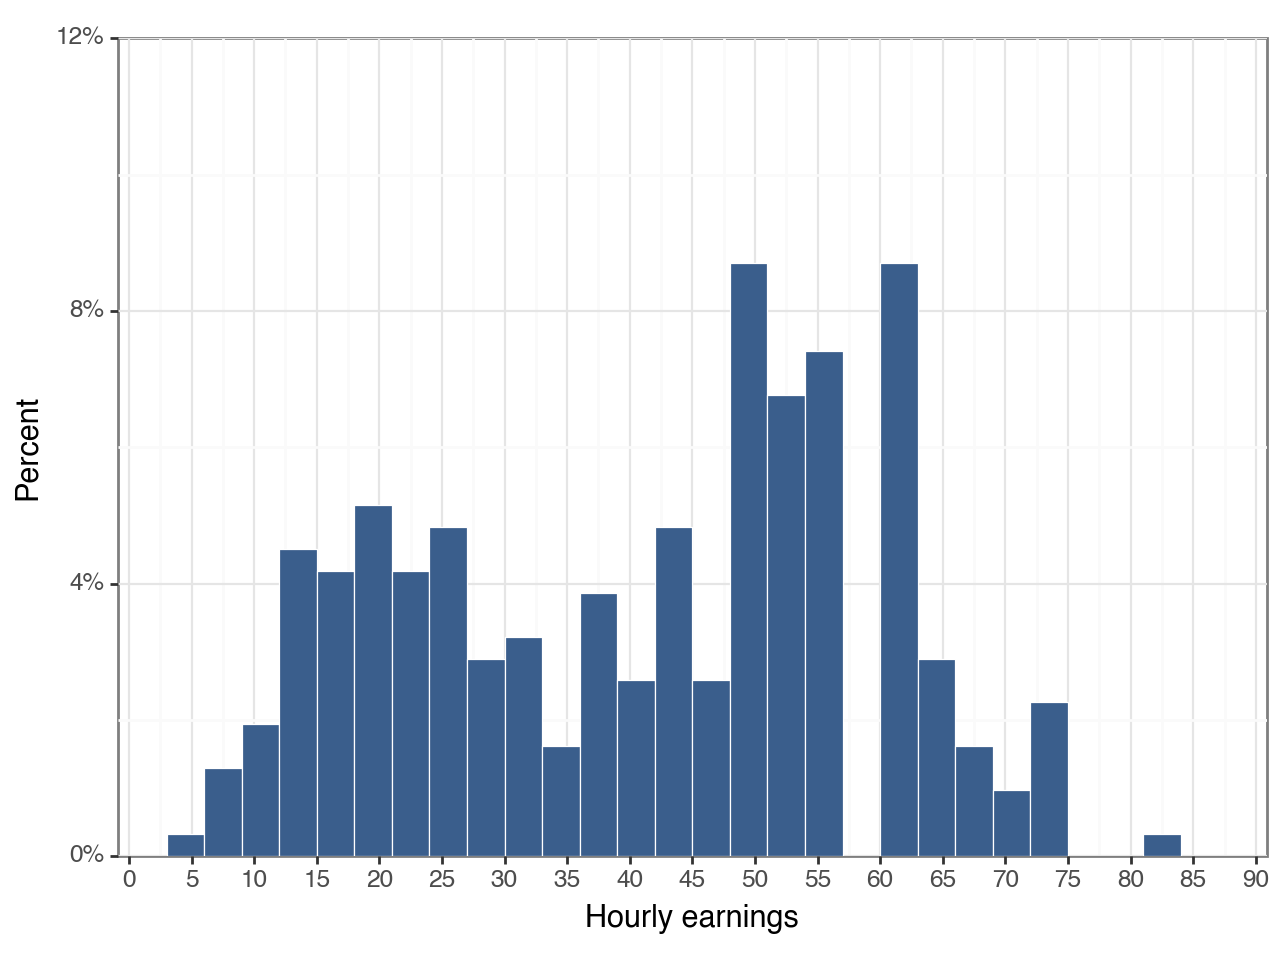

<Figure Size: (640 x 480)>

In [4318]:
(
    ggplot(df, aes(x="earnperhour", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=3,
        boundary=0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Hourly earnings", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 90), breaks=seq(0, 90, 5))
    + scale_y_continuous(
        labels=percent_format(), #mizani
        breaks=seq(0, 0.12, 0.04),
        limits=(0, 0.12),
        expand=(0.0, 0.0),
    )
    + theme_bw()
)

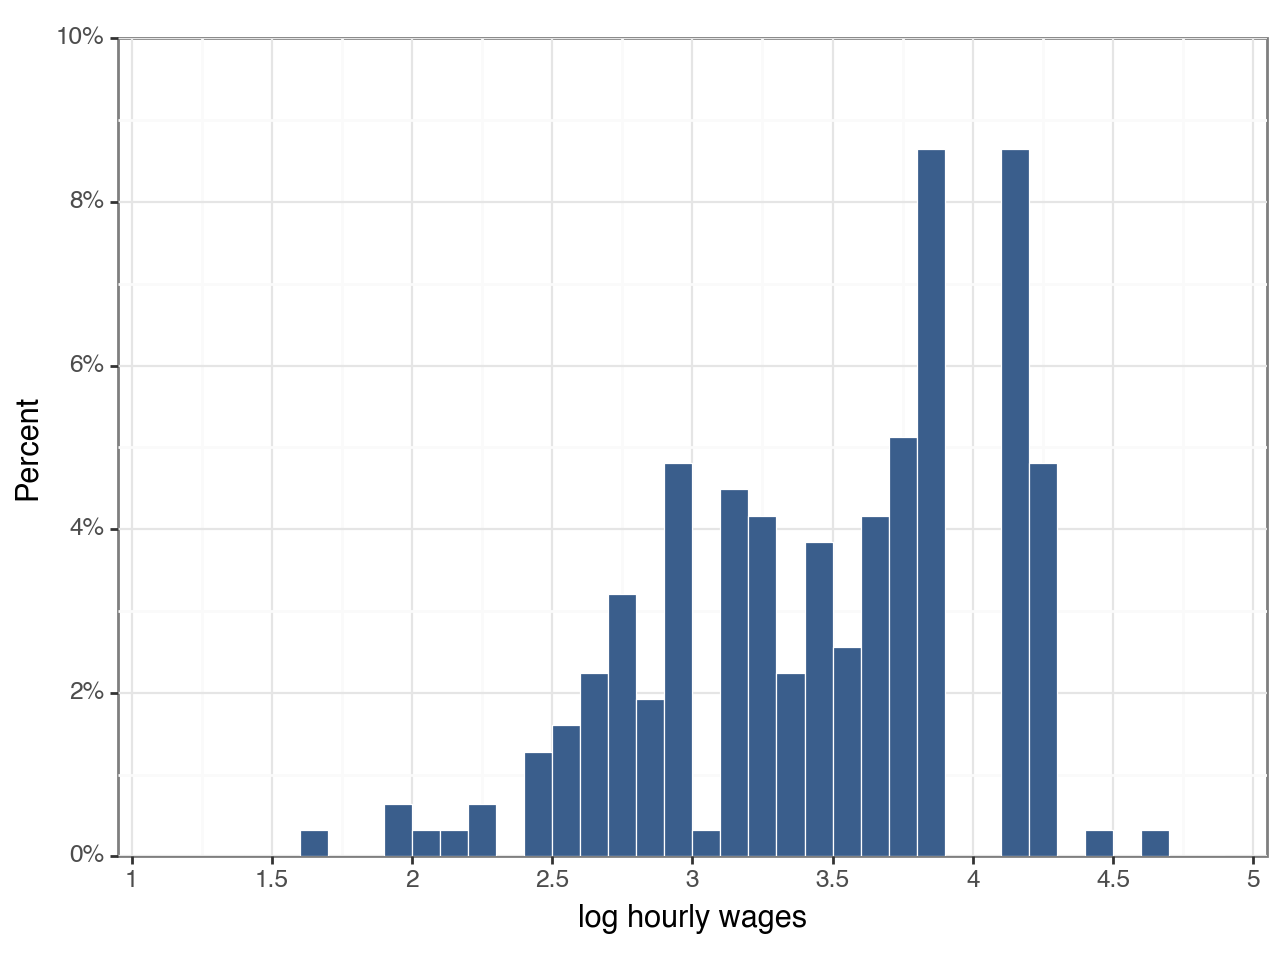

<Figure Size: (640 x 480)>

In [4319]:
(
    ggplot(df, aes(x="lnearnperhour", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=0.1,
        boundary=0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="log hourly wages", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 5, 0.5))
    + scale_y_continuous(
        expand=(0.0, 0.0),
        limits=(0, 0.1),
        breaks=seq(0, 0.1, 0.02),
        labels=percent_format(), #mizani
    )
    + theme_bw()
)


## Regression to Analyze Nonlinearity : Log hourly wage and age

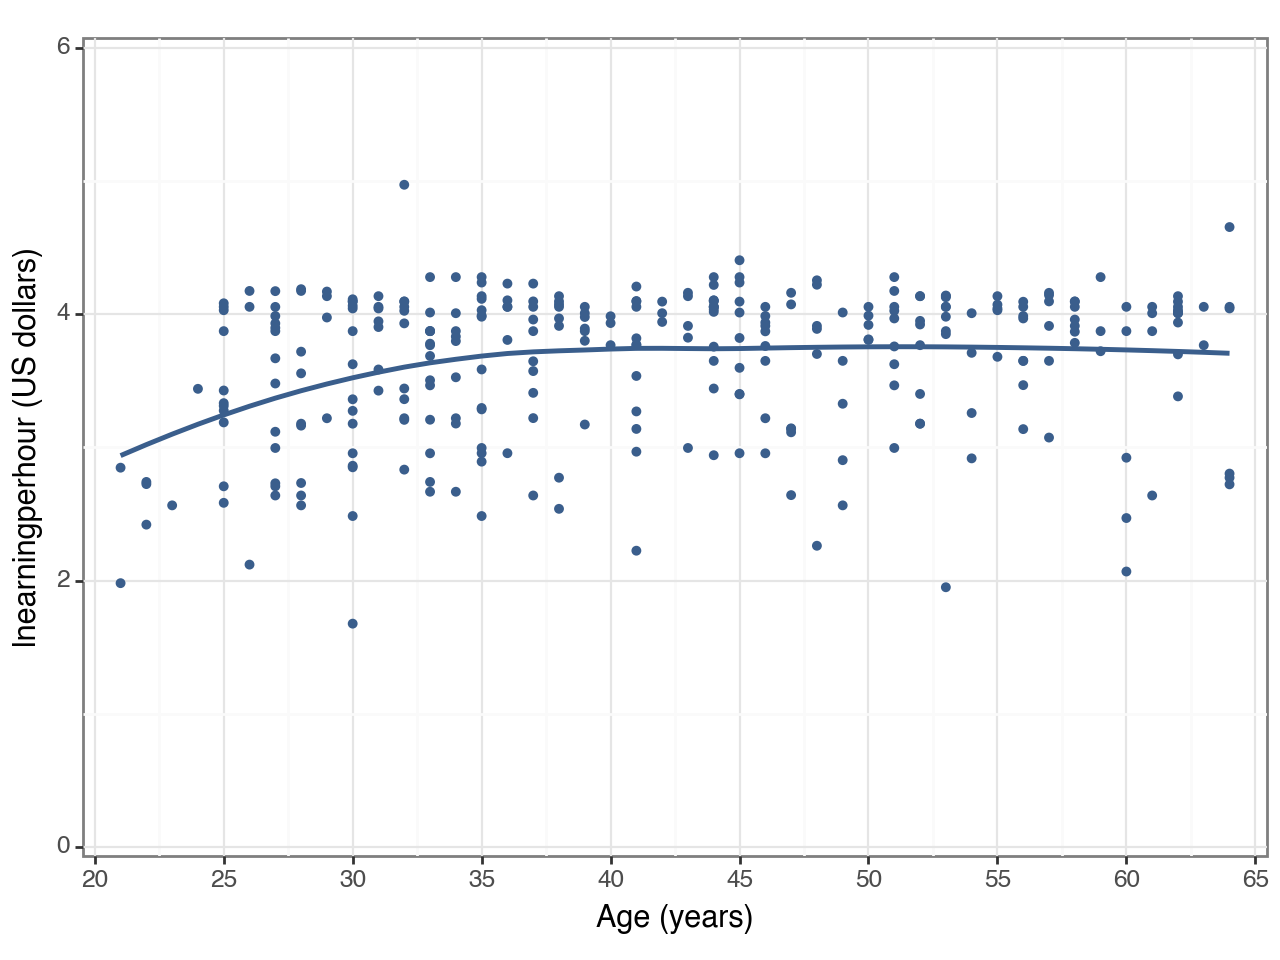

<Figure Size: (640 x 480)>

In [4320]:
ggplot(df, aes(x="age", y="lnearnperhour")) + geom_point(
    color=color[0], size=1, alpha=0.8, show_legend=False, na_rm=True
) + geom_smooth(method="loess", se=False, colour=color[0], size=1, span=0.9) + labs(
    x="Age (years)", y="lnearningperhour (US dollars)"
) + theme_bw() + expand_limits(
    x=0.01, y=0.01
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 6), breaks=seq(0, 6, 2)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(20, 65), breaks=seq(20, 65, 5)
)

Logearnings are slightly higher for older ages among young adult pharmacists:  0.3 log point higher for 35-year-old analysts than for 20-year-old analysts

Age differences are positive but get smaller and smaller as we compare older people; little or any difference by age [35,60]; those older than 60 earn less on average

* increasing for young pharmacists
* flat for middle-age and old pharmacists

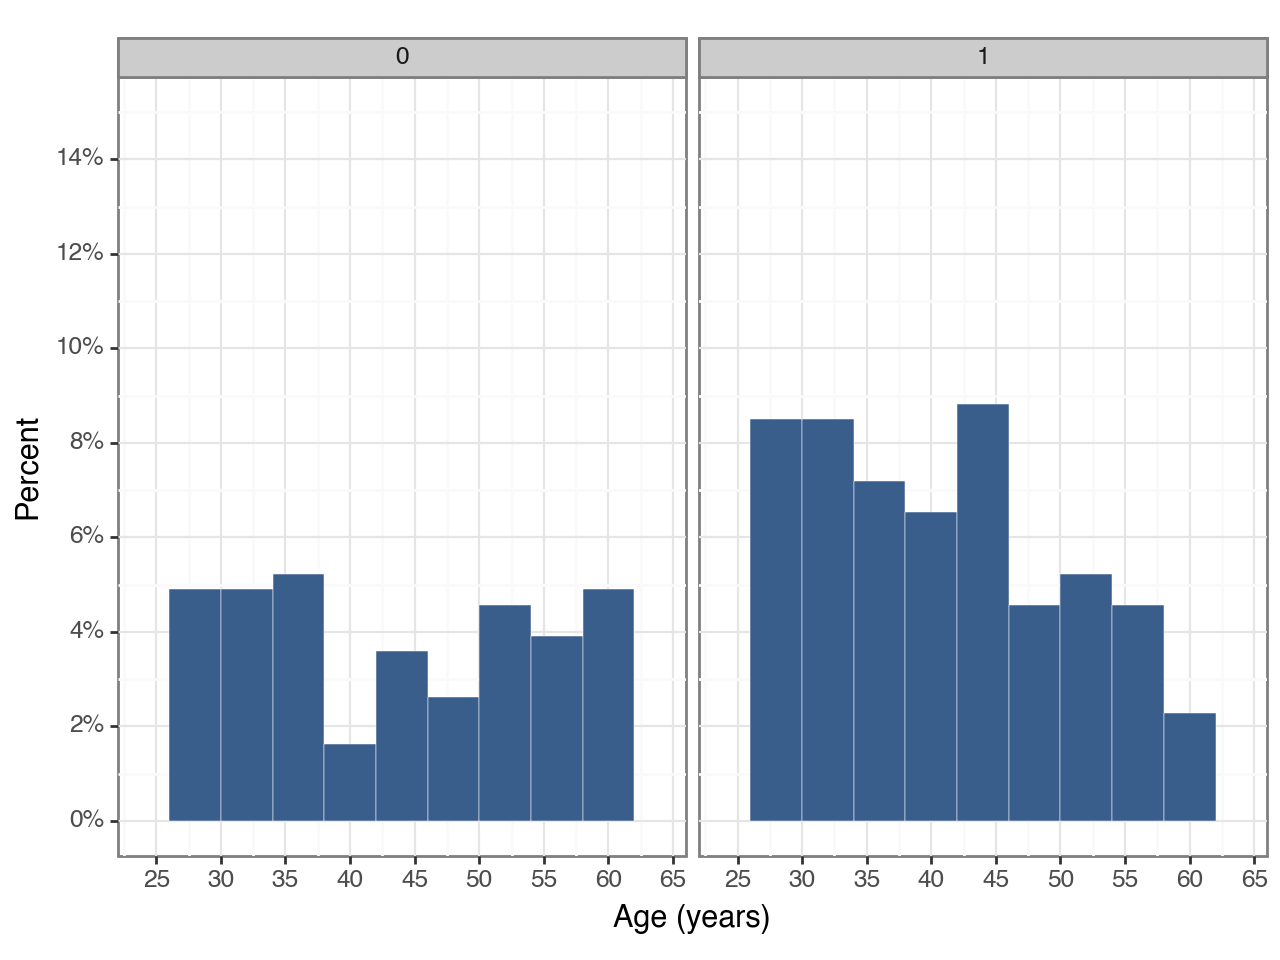

<Figure Size: (640 x 480)>

In [4321]:
(
    ggplot(df, aes(x="age", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=4,
        color="white",
        fill=color[0],
        size=0.10,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Age (years)", y="Percent")
    + facet_wrap("~female", labeller={"False": "Male", "True": "Female"})
    + labs(x="Age (years)", y="Percent")
    + scale_x_continuous(
        limits=(24, 64),
        breaks=seq(25, 65, by=5),
    )
    + scale_y_continuous(
        limits=(0, 0.15), breaks=seq(0, 0.15, by=0.02), labels=percent_format()
    )
    + theme_bw()
)

The following conclusions can be drawn from these two plots:
* The number of female pharmacists is more than male pharmacists.
* The number of young pharmacists is higher than older ones for both genders

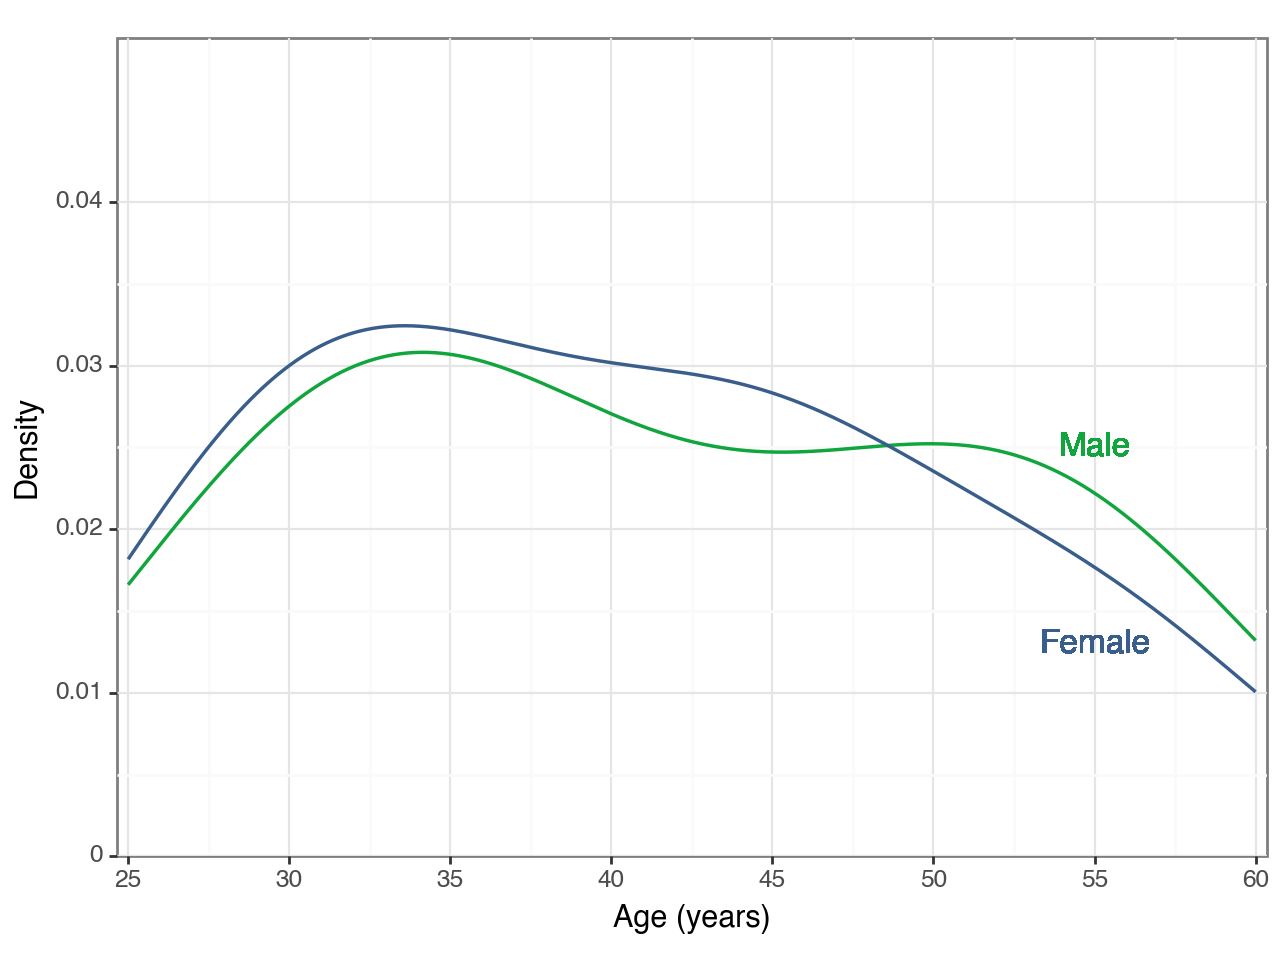

<Figure Size: (640 x 480)>

In [4322]:
(
    ggplot(df, aes(x="age", y="stat(density)", color="factor(female)"))
    + geom_density(adjust=1.5, show_legend=False, na_rm=True, size=0.7)
    + labs(x="Age (years)", y="Density", color="")
    + scale_color_manual(
        name="", values=(color[1], color[0]), labels=("Male", "Female")
    )
    + scale_x_continuous(expand=(0.01, 0.01), limits=(25, 60), breaks=seq(25, 60, by=5))
    + scale_y_continuous(
        expand=(0.0, 0.0), limits=(0, 0.05), breaks=seq(0, 0.04, by=0.01)
    )
    + geom_text(aes(x=55, y=0.025, label="'Male'"), color=color[1], size=12)
    + geom_text(aes(x=55, y=0.013, label="'Female'"), color=color[0], size=12)
    + theme_bw()
)

In [4323]:
df["agesq"] = np.power(df["age"], 2)
df["agecu"] = np.power(df["age"], 3)
df["agequ"] = np.power(df["age"], 4)

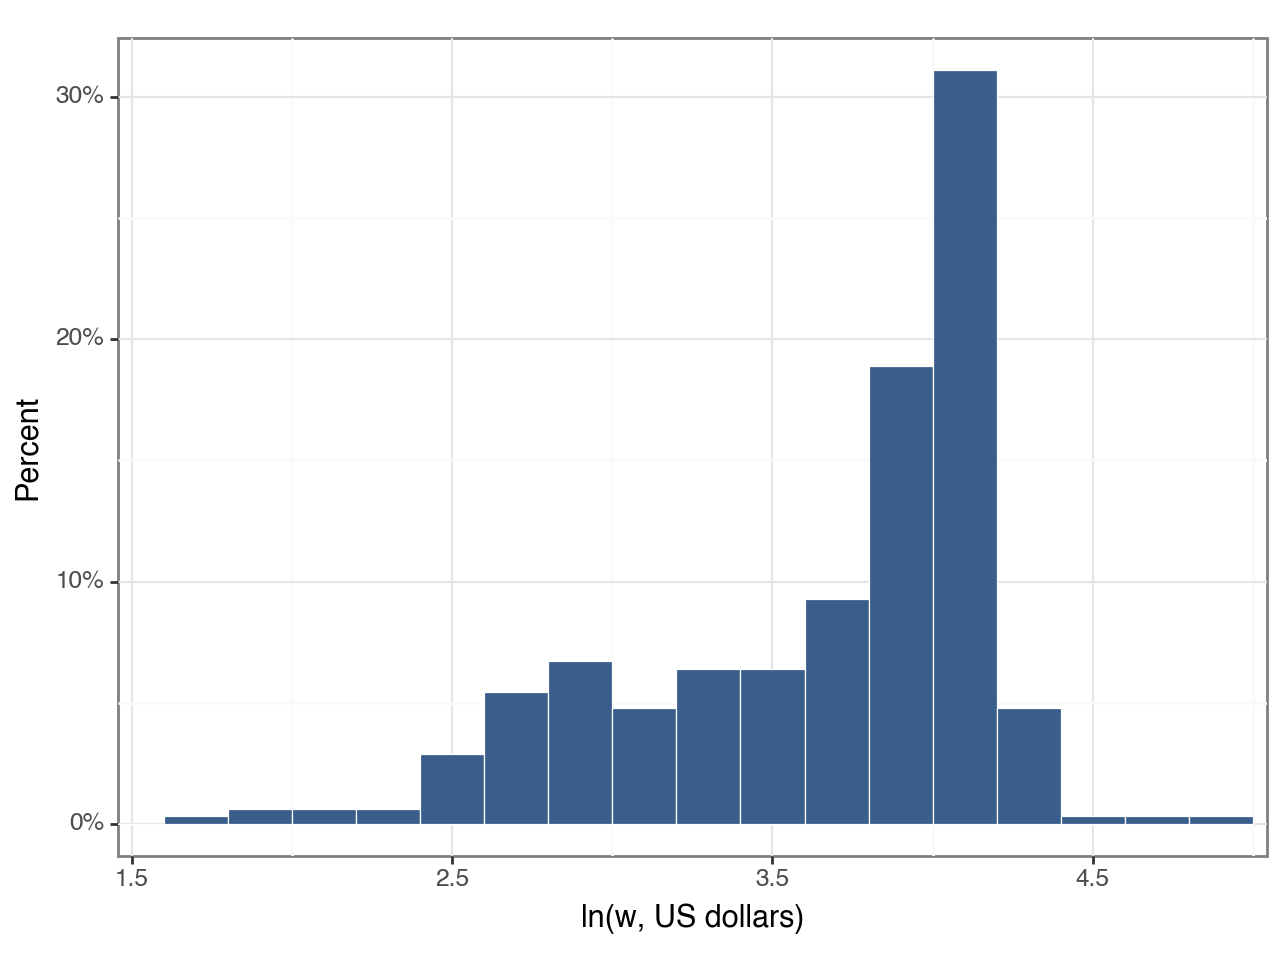

<Figure Size: (640 x 480)>

In [4324]:
ggplot(df, aes(x="lnearnperhour")) + geom_histogram(
    aes(y="(stat(count)) / sum(stat(count))"),
    binwidth=0.2,
    boundary=0,
    color="white",
    fill=color[0],
    size=0.25,
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + coord_cartesian(xlim=(1.5, 5)) + labs(
    x="ln(w, US dollars)", y="Percent"
) + expand_limits(
    x=0.01, y=0.01
) + scale_y_continuous(
    expand=(0.01, 0.01), labels=percent_format()
) + scale_x_continuous(
    expand=(0.01, 0.01), breaks=seq(1.5, 5, 1)
) + theme_bw()


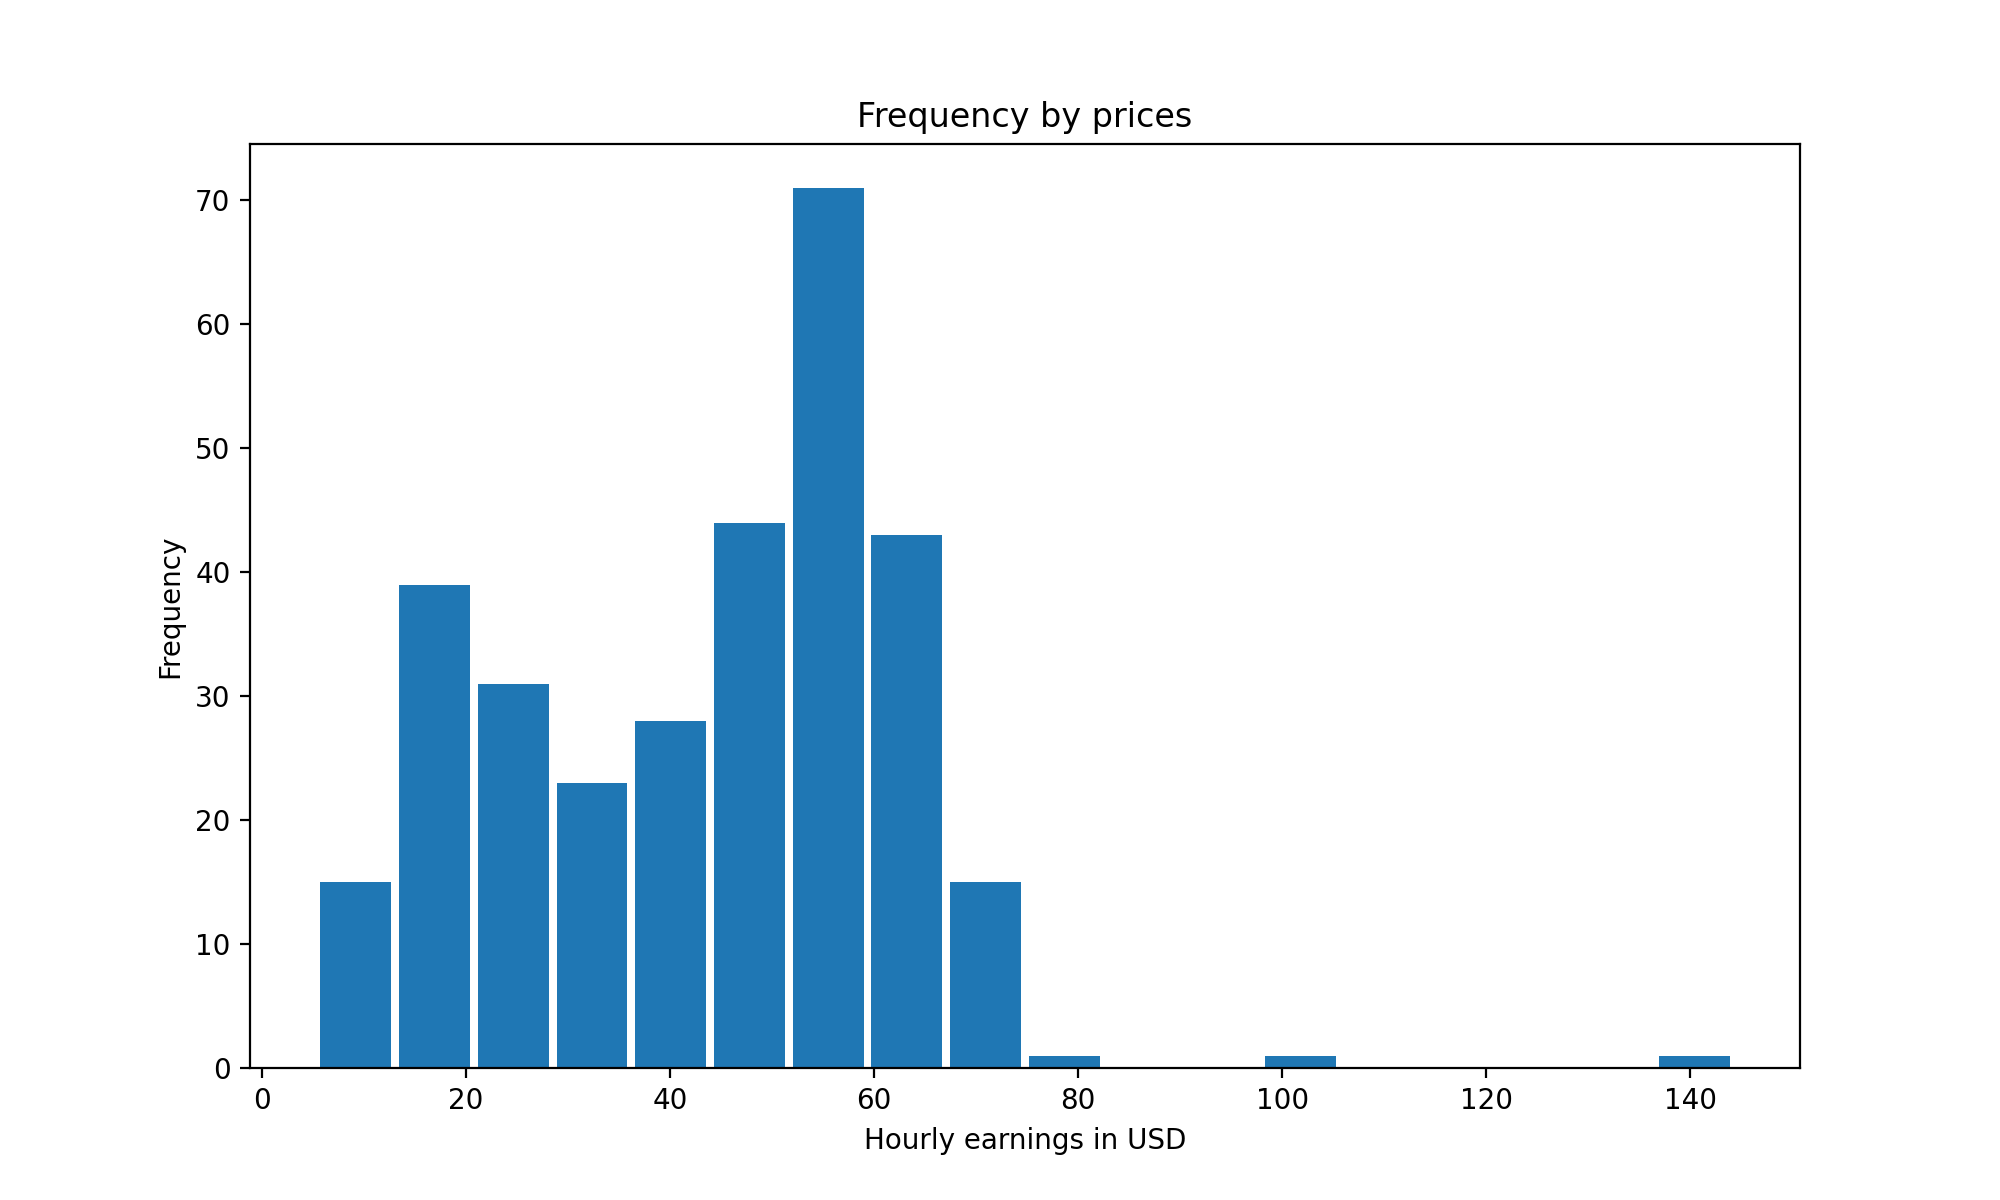

In [4325]:
df.plot(
    kind = 'hist', figsize = (10,6),
    y = 'earnperhour', 
    bins = 18,
    rwidth = 0.9, legend = False, 
    xlabel = 'Hourly earnings in USD', title = 'Frequency by prices')
plt.show();

The highest frequency of hourly earnings varies between 50-60 USD. 100 and 140 USD can be considered outliers

## Investigating gender wage gap conditional on age

In [4326]:
reg1 = smf.ols(formula="lnearnperhour~female", data=df).fit(cov_type="HC1")
reg2 = smf.ols(formula="lnearnperhour~female+age", data=df).fit(cov_type="HC1")
reg3 = smf.ols(formula="age~female", data=df).fit(cov_type="HC1")

In [4327]:
stargazer = Stargazer([reg1, reg2, reg3])
stargazer.custom_columns(["ln wage", "ln wage", "age"], [1, 1, 1])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

- In this sample, women are expected to earn 6 log points more than men, on average

- Comparing employees of the same age, women are expected to earn around 14.8 log points less than men in this sample, on average; 1 year older employees are expected to earn 7% more on average, other things equal

## Creating predictors (dummy variables)

In [4328]:
# Educational variables : Master, professional, PhD
df["ed_MA"] = (df["grade92"] == 44).astype(int)
df["ed_Profess"] = (df["grade92"] == 45).astype(int)
df["ed_Phd"] = (df["grade92"] == 46).astype(int)

In [4329]:
# Variables for race
df["white"] = (df["race"] == 1).astype(int)
df["afram"] = (df["race"] == 2).astype(int)
df["asian"] = (df["race"] == 4).astype(int)

In [4330]:
# Variables for Relational status
df["married"] = ((df["marital"] == 1) | (df["marital"] == 2)).astype(int)
df["divorced"] = ((df["marital"] == 3) & (df["marital"] == 5)).astype(int)
df["wirowed"] = (df["marital"] == 4).astype(int)
df["nevermar"] = (df["marital"] == 7).astype(int)

# Variables for status of having children
df["child0"] = (df["chldpres"] == 0).astype(int)
df["child1"] = (df["chldpres"] == 1).astype(int)
df["child2"] = (df["chldpres"] == 2).astype(int)
df["child3"] = (df["chldpres"] == 3).astype(int)
df["child4pl"] = (df["chldpres"] >= 4).astype(int)

# Work-related variables
df["fedgov"] = (df["class"] == "Government - Federal").astype(int)
df["stagov"] = (df["class"] == "Government - State").astype(int)
df["locgov"] = (df["class"] == "Government - Local").astype(int)
df["nonprof"] = (df["class"] == "Private, Nonprofit").astype(int)

# Working mode variable
df["dentoffice"] = (df["ind02"] == "Offices of dentists (6212)").astype(int)
df["hospital"] = (df["ind02"] == "Hospitals (622)").astype(int)

In [4331]:
df["uhourssq"] = np.power(df["uhours"], 2)
df["uhourscu"] = np.power(df["uhours"], 3)
df["uhoursqu"] = np.power(df["uhours"], 4)

In [4332]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,312.000,163287.054,94036.097,25.000,80390.750,168000.500,241633.750,315945.000
hhid,312.000,432110673795590.062,325875801125416.750,410196717615.000,110711534713909.250,401122955298360.500,712031388002765.000,999520952590972.000
weight,312.000,2335.338,1235.593,268.676,1267.040,2547.595,3242.202,6149.893
earnwke,312.000,1676.764,776.329,58.000,986.000,1774.730,2307.690,2884.610
uhours,312.000,38.112,8.557,7.000,40.000,40.000,40.000,70.000
grade92,312.000,44.292,1.673,39.000,43.000,45.000,46.000,46.000
race,312.000,1.651,1.402,1.000,1.000,1.000,1.000,10.000
ethnic,13.000,3.692,2.594,1.000,2.000,3.000,6.000,8.000
age,312.000,41.843,11.474,21.000,32.000,41.000,51.000,64.000
sex,312.000,1.606,0.489,1.000,1.000,2.000,2.000,2.000


In [4333]:
# creating 4 regressions from the simplest to most complex one
reg4 = smf.ols("earnperhour ~ age + agesq + agecu + agequ", data=df).fit(cov_type="HC0")
reg5 = smf.ols("earnperhour ~ age + agesq + agecu + agequ + female + ed_Profess + ed_Phd + ed_MA", data=df).fit(cov_type="HC0")
reg6 = smf.ols("earnperhour ~ age + agesq + agecu + agequ + female + ed_Profess + ed_Phd + ed_MA + white + afram + asian + married + divorced + wirowed + nevermar + child0 + child1 + child2 + child3 + child4pl + fedgov + stagov + locgov + nonprof + dentoffice + hospital + uhourssq + uhourscu + uhoursqu", data=df).fit(cov_type="HC0")
reg7 = smf.ols("earnperhour ~ age + agesq + agecu + agequ + female + ed_Profess*age + ed_Phd*age + ed_MA*age + white*age + afram*age + asian*age + married*age + divorced*age + wirowed*age + nevermar*age + child0*age + child1*age + child2*age + child3*age + child4pl*age + fedgov*age + stagov*age + locgov*age + nonprof*age + dentoffice*age + hospital*age + uhourssq*age + uhourscu*age + uhoursqu*age", data=df).fit(cov_type="HC0")

In [4334]:
# creating models 
models = [reg4, reg5, reg6, reg7]
robustcov_results=[]

for i, model in enumerate(models):
    result=model.get_robustcov_results(cov_type='HC1').summary()
    robustcov_results.append(result)
    print()
    print(f'Regression: reg{i+1}')
    print(result)


Regression: reg1
                            OLS Regression Results                            
Dep. Variable:            earnperhour   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     10.91
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           7.88e-07
Time:                        23:31:51   Log-Likelihood:                -1349.1
No. Observations:                 312   AIC:                             2708.
Df Residuals:                     307   BIC:                             2727.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -314.0032    173.372  

In [4335]:
#### 1) RMSE in the full sample

In [4336]:
# RMSE in the full sample
rmse1 = rmse(reg4.fittedvalues,df.earnperhour)
rmse2 = rmse(reg5.fittedvalues,df.earnperhour)
rmse3 = rmse(reg6.fittedvalues,df.earnperhour)
rmse4 = rmse(reg7.fittedvalues,df.earnperhour)
print(rmse1,rmse2,rmse3,rmse4)

18.264463819179195 17.970827272036928 17.200248063822276 16.126847019700822


In [4337]:
#### 2) Cross Validated RMSE

In [4338]:
from sklearn.model_selection import KFold
k = KFold(n_splits=4, shuffle=False, random_state=None)

In [4339]:
def cv_reg(formula, data, kfold, robustse=None):
    regression_list = []
    predicts_on_test = []
    rsquared = []
    rmse_list = []

    # Calculating OLS for each fold

    for train_index, test_index in k.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)
        data_train, data_test = data.iloc[train_index, :], data.iloc[test_index, :]
        if robustse is None:
            model = smf.ols(formula, data=data_train).fit()
        else:
            model = smf.ols(formula, data=data_train).fit(cov_type=robustse)
        regression_list += [model]
        predicts_on_test += [model.predict(data_test)]
        rsquared += [model.rsquared]
        rmse_list += [rmse(data_train[formula.split("~")[0]], model.predict())]

    return {
        "regressions": regression_list,
        "test_predict": predicts_on_test,
        "r2": rsquared,
        "rmse": rmse_list,
    }


def summarize_cv(cvlist, stat="rmse"):
    result = pd.DataFrame(
        {"Model" + str(x + 1): cvlist[x][stat] for x in range(len(cv_list))}
    )
    result["Resample"] = ["Fold" + str(x + 1) for x in range(len(cvlist[0]["rmse"]))]
    result = result.set_index("Resample")
    result = pd.concat([result, pd.DataFrame(result.mean(), columns=["Average"]).T])
    return result

In [4340]:
cv1 = cv_reg("earnperhour~age+agesq+agecu+agequ", df, k, "HC0")
cv2 = cv_reg("earnperhour~age+agesq+agecu+agequ+female+ed_Profess+ed_Phd+ed_MA", df, k, "HC0")
cv3 = cv_reg("earnperhour~age+agesq+agecu+agequ+female+ed_Profess+ed_Phd+ed_MA+white+afram+asian+married+divorced+wirowed+nevermar+child0+child1+child2+child3+child4pl+fedgov+stagov+locgov+nonprof+dentoffice+hospital+uhourssq+uhourscu+uhoursqu",
    df,
    k,
    "HC0",
)
cv4 = cv_reg(
    "earnperhour~age+agesq+agecu+agequ+female+ed_Profess*age+ed_Phd*age+ed_MA*age+white*age+afram*age+asian*age+married*age+divorced*age+wirowed*age+nevermar*age+child0*age+child1*age+child2*age+child3*age+child4pl*age+fedgov*age+stagov*age+locgov*age+nonprof*age+dentoffice*age+hospital*age+uhourssq*age+uhourscu*age+uhoursqu*age",
    df,
    k,
    "HC0",
)

cv_list = [cv1, cv2, cv3, cv4]

In [4341]:
summarize_cv(cv_list)

,Model1,Model2,Model3,Model4
Fold1,18.247,17.977,17.375,15.717
Fold2,18.608,18.125,17.045,15.701
Fold3,17.286,16.970,16.216,15.212
Fold4,18.782,18.495,17.204,15.752
Average,18.231,17.892,16.960,15.596


In [4342]:
df = df[
    [
        "age",
        "agesq",
        "agecu",
        "agequ",
        "female",
        "ed_Profess",
        "ed_Phd",
        "ed_MA",
        "white",
        "afram",
        "asian",
        "married",
        "divorced",
        "wirowed",
        "nevermar",
        "child0",
        "child1",
        "child2",
        "child3",
        "child4pl",
        "fedgov",
        "stagov",
        "locgov",
        "nonprof",
        "dentoffice",
        "hospital",
        "uhourssq",
        "uhourscu",
        "uhoursqu",
        "lnearnperhour", 
        "earnperhour",
    ]
]

In [4343]:
df.dtypes

age                int64
agesq              int64
agecu              int64
agequ              int64
female             int64
ed_Profess         int64
ed_Phd             int64
ed_MA              int64
white              int64
afram              int64
asian              int64
married            int64
divorced           int64
wirowed            int64
nevermar           int64
child0             int64
child1             int64
child2             int64
child3             int64
child4pl           int64
fedgov             int64
stagov             int64
locgov             int64
nonprof            int64
dentoffice         int64
hospital           int64
uhourssq           int64
uhourscu           int64
uhoursqu           int64
lnearnperhour    float64
earnperhour      float64
dtype: object

In [4344]:
newdf = pd.DataFrame(pd.Series({
        "age":40,
        "agesq":40**2,
        "agecu":40**3,
        "agequ":40**4,
        "female":1,
        "ed_Profess":0,
        "ed_Phd":1,
        "ed_MA":0,
        "white":1,
        "afram":0,
        "asian":0,
        "married":1,
        "divorced":0,
        "wirowed":0,
        "nevermar":0,
        "child0":1,
        "child1":0,
        "child2":0,
        "child3":0,
        "child4pl":0,
        "fedgov":0,
        "stagov":1,
        "locgov":0,
        "nonprof":0,
        "dentoffice":1,
        "hospital":0,
        "uhourssq":30**2,
        "uhourscu":30**3,
        "uhoursqu":30**4,
        "lnearnperhour":np.nan,
})).T
newdf

,age,agesq,agecu,agequ,female,ed_Profess,ed_Phd,ed_MA,white,afram,...,fedgov,stagov,locgov,nonprof,dentoffice,hospital,uhourssq,uhourscu,uhoursqu,lnearnperhour
0,40.000,1600.000,64000.000,2560000.000,1.000,0.000,1.000,0.000,1.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,900.000,27000.000,810000.000,NaN


In [4345]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4346]:
reg1.resid.describe()

count   312.000
mean     -0.000
std       0.549
min      -2.034
25%      -0.390
50%       0.212
75%       0.404
max       1.362
dtype: float64

In [4347]:
p1=reg4.get_prediction(newdf).summary_frame()
p1

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,45.647,1.756,42.205,49.090,9.396,81.899


In [4348]:
p2=reg5.get_prediction(newdf).summary_frame()
p2

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,48.396,2.236,44.014,52.778,12.387,84.405


In [4349]:
p3=reg6.get_prediction(newdf).summary_frame()
p2

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,48.396,2.236,44.014,52.778,12.387,84.405


In [4350]:
p4=reg7.get_prediction(newdf).summary_frame()
p2

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,48.396,2.236,44.014,52.778,12.387,84.405


In [4351]:
pd.DataFrame(
    {
        " ": ["Predicted", "PI_low(95%)", "PI_high(95%)"],
        "Model1": p1[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model2": p2[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model3": p3[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model4": p4[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
    }
).set_index(" ")

,Model1,Model2,Model3,Model4
,,,,
Predicted,45.647,48.396,27.537,33.867
PI_low(95%),9.396,12.387,-11.062,-2.540
PI_high(95%),81.899,84.405,66.135,70.275


In [4352]:
p1=reg4.get_prediction(newdf).summary_frame(alpha=0.2)
p2=reg5.get_prediction(newdf).summary_frame(alpha=0.2)
p3=reg6.get_prediction(newdf).summary_frame(alpha=0.2)
p4=reg7.get_prediction(newdf).summary_frame(alpha=0.2)

pd.DataFrame(
    {
        " ": ["Predicted", "PI_low(80%)", "PI_high(80%)"],
        "Model1": p1[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model2": p2[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model3": p3[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
        "Model4": p4[["mean", "obs_ci_lower", "obs_ci_upper"]].values.tolist()[0],
    }
).set_index(" ")

,Model1,Model2,Model3,Model4
,,,,
Predicted,45.647,48.396,27.537,33.867
PI_low(80%),21.944,24.851,2.298,10.062
PI_high(80%),69.351,71.941,52.775,57.673


In [4353]:
#### 3) Creating BIC for these 4 models in the full sample
bic = [round(x.bic, 2) for x in [reg4, reg5, reg6, reg7]]
sg = Stargazer([reg4, reg5, reg6, reg7])
sg.add_line('BIC', bic)
sg